In [1]:
from utils import create_llm, create_workflow
from IPython.display import Image, display

In [2]:
PROJECT_ID = "1641f1db-bab8-4687-8a0e-efecd95a5361"

llm_research = create_llm(
    api_base="https://api.us-east-1.langdb.ai",
    project_id=PROJECT_ID,
    model_name="gpt-4o"
)
llm_chart = create_llm(
    api_base="https://api.us-east-1.langdb.ai",
    project_id=PROJECT_ID,
    model_name="claude-3-5-sonnet-20240620"
)


In [ ]:
workflow = create_workflow(llm_research, llm_chart)

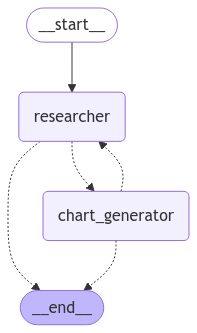

In [4]:
try:
    display(Image(workflow.get_graph().draw_mermaid_png()))
except Exception:
    # This requires some extra dependencies and is optional
    pass

{'researcher': {'messages': [HumanMessage(content="First, get the UK's GDP over the past 5 years, then make a line chart of it. Once you make the chart, finish.", additional_kwargs={}, response_metadata={}, id='73fae0f8-2743-4639-8d5f-2e8eee774377'), AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_60qIZ8lwhJkDKMZQ0aFHEizd', 'function': {'arguments': '{"query":"UK GDP over the past 5 years"}', 'name': 'tavily_search_results_json'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 26, 'prompt_tokens': 312, 'total_tokens': 338, 'completion_tokens_details': None, 'prompt_tokens_details': None, 'cost': 0.001248}, 'model_name': 'gpt-4o', 'system_fingerprint': None, 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-a6684cf8-602f-4657-b253-18b935fd8e9e-0', tool_calls=[{'name': 'tavily_search_results_json', 'args': {'query': 'UK GDP over the past 5 years'}, 'id': 'call_60qIZ8lwhJkDKMZQ0aFHEizd', 'type': 'tool_call'}], u

Python REPL can execute arbitrary code. Use with caution.


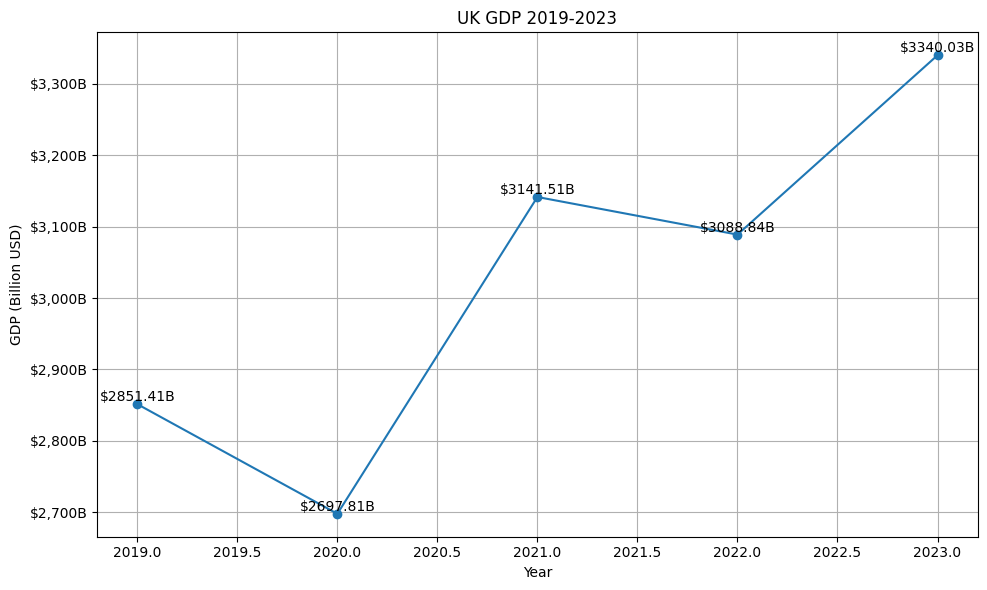

{'chart_generator': {'messages': [HumanMessage(content="First, get the UK's GDP over the past 5 years, then make a line chart of it. Once you make the chart, finish.", additional_kwargs={}, response_metadata={}, id='73fae0f8-2743-4639-8d5f-2e8eee774377'), AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_60qIZ8lwhJkDKMZQ0aFHEizd', 'function': {'arguments': '{"query":"UK GDP over the past 5 years"}', 'name': 'tavily_search_results_json'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 26, 'prompt_tokens': 312, 'total_tokens': 338, 'completion_tokens_details': None, 'prompt_tokens_details': None, 'cost': 0.001248}, 'model_name': 'gpt-4o', 'system_fingerprint': None, 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-a6684cf8-602f-4657-b253-18b935fd8e9e-0', tool_calls=[{'name': 'tavily_search_results_json', 'args': {'query': 'UK GDP over the past 5 years'}, 'id': 'call_60qIZ8lwhJkDKMZQ0aFHEizd', 'type': 'tool_call'

In [5]:
events = workflow.stream(
    {
        "messages": [
            (
                "user",
                "First, get the UK's GDP over the past 5 years, then make a line chart of it. "
                "Once you make the chart, finish.",
            )
        ],
    },
    {"recursion_limit": 150},
)

for s in events:
    print(s)
    print("----")